In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [86]:
PROGRAM = 'getpixel'

In [87]:
PATH = f'data/setup_test_{PROGRAM}_'

In [88]:
data_in_app = pd.read_csv(f'{PATH}app.csv')

In [89]:
data_in = pd.read_csv(f'{PATH}program.csv')

In [90]:
data_in['color_value'] = -1

increment_counter = 0
for index_app, row_app in data_in_app.iterrows():
    if row_app['event_type'] == 'render_stop':
        for index_program, row_program in data_in.iterrows():
            if row_program['timestamp'] > row_app['timestamp']:
                data_in.at[index_program, 'color_value'] += 1

data_in

,event_type,timestamp,color_equal,color_value
0,got color at,1989306568,1,-1
1,got color at,1989308200,1,-1
2,got color at,1989310028,1,-1
3,got color at,1989312049,1,-1
4,got color at,1989314111,1,-1
...,...,...,...,...
319,got color at,1990107686,1,10
320,got color at,1990110615,1,10
321,got color at,1990112424,1,10
322,got color at,1990115222,1,10


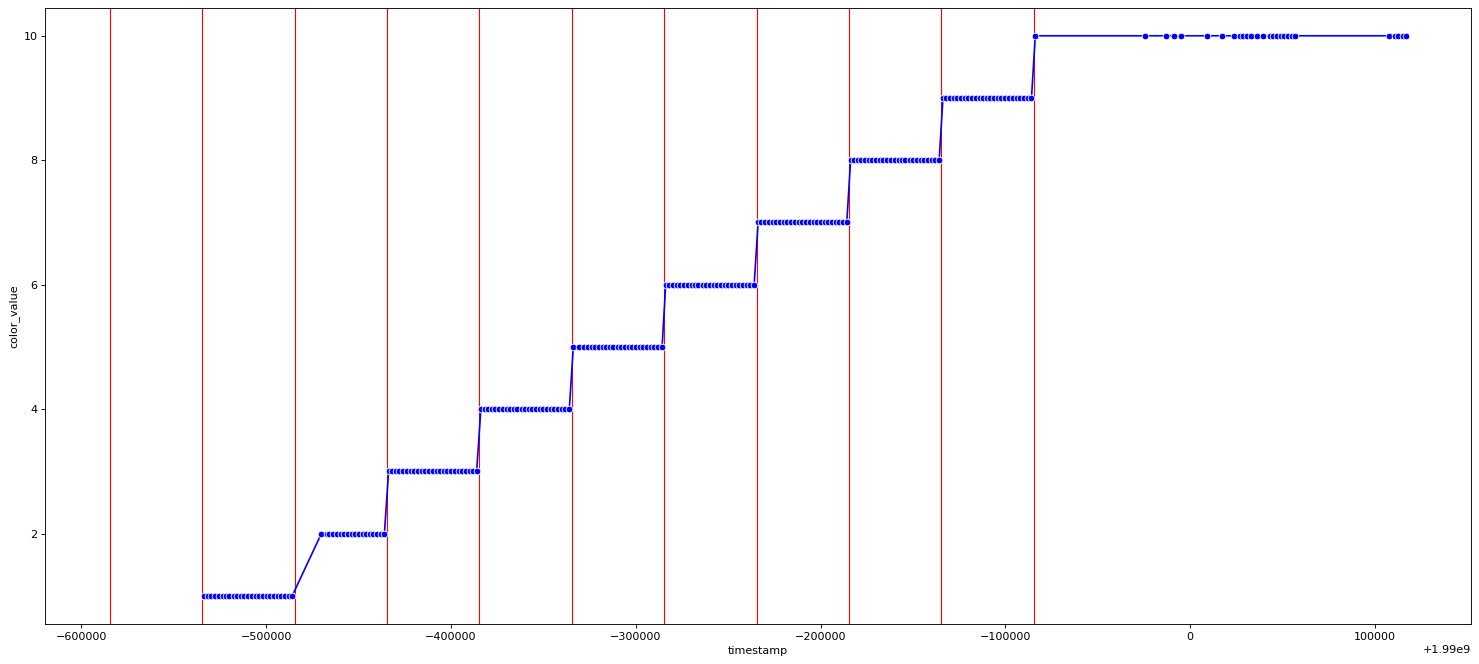

In [91]:
plt.figure(figsize=(23, 10), dpi=80)
ax = plt.gca()

# for value in data_in[data_in['color_value'] > -1]['timestamp']:
#     ax.axvline(value, color='blue', linewidth='0.5')

# for value in data_in[data_in['color_equal'] == 0]['timestamp']:
#     ax.axvline(value, color='red', linewidth='1')

for value in data_in_app[data_in_app['event_type'] == 'render_stop']['timestamp']:
    ax.axvline(value, color='red', linewidth='1')

palette = {1: 'blue', 0: 'red'}
plot = sns.lineplot(data=data_in[data_in['color_value'] > 0], x='timestamp', y='color_value', marker='o', color='blue')


In [92]:
print(f'vsync: {1/500 * 1000}')
for i in range(10):
    num_measurements = len(data_in[data_in['color_value'] == i])
    print(f'color value {i}: {num_measurements} measurements -> every {50 / num_measurements}ms')

vsync: 2.0
color value 0: 25 measurements -> every 2.0ms
color value 1: 25 measurements -> every 2.0ms
color value 2: 18 measurements -> every 2.7777777777777777ms
color value 3: 25 measurements -> every 2.0ms
color value 4: 25 measurements -> every 2.0ms
color value 5: 24 measurements -> every 2.0833333333333335ms
color value 6: 25 measurements -> every 2.0ms
color value 7: 25 measurements -> every 2.0ms
color value 8: 25 measurements -> every 2.0ms
color value 9: 25 measurements -> every 2.0ms
